# K Fold Cross Validation

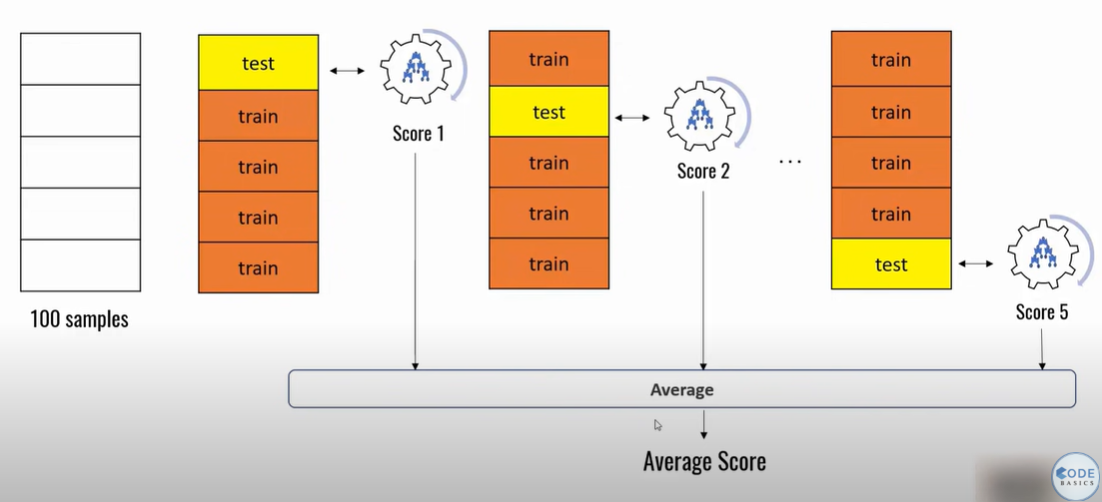

In [2]:
from PIL import Image

img = Image.open('D:/kfold.png')
display(img)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [17]:
digits = load_digits()

In [18]:
X_train , X_test , y_train , y_test = train_test_split(digits.data, digits.target , test_size=0.2)

In [19]:
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train , y_train)
lr.score(X_test , y_test)

0.95

In [20]:
supportvector = SVC()
supportvector.fit(X_train , y_train)
supportvector.score(X_test , y_test)

0.9777777777777777

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
rf.score(X_test , y_test)

0.9694444444444444

## But there is an issue still persist that if i re run line(7) , data split randomly and rerun model its accuracy changes , here we include 'K fold'

# Different approach -- We can fing max_accuracy of model by shuffling this dataset for each model

In [25]:
from sklearn.model_selection import KFold

In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [32]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [33]:
X = digits.data
y = digits.target

results = {name: [] for name in models.keys()}

# Perform K-Fold Cross Validation for each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]  # Use array indexing
        y_train, y_test = y[train_index], y[test_index]  # Use array indexing
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[model_name].append(accuracy)

# Display average accuracy for each model
for model_name, scores in results.items():
    avg_accuracy = sum(scores) / len(scores)
    print(f"Average accuracy for {model_name}: {avg_accuracy:.4f}")

Evaluating Logistic Regression...
Evaluating SVM...
Evaluating Random Forest...
Average accuracy for Logistic Regression: 0.9616
Average accuracy for SVM: 0.9878
Average accuracy for Random Forest: 0.9750


# Another approach rather than kfold -> stratified KFold

In [51]:
# Define the function to get model accuracy
def get_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [52]:
from sklearn.model_selection import StratifiedKFold

In [53]:
folds = StratifiedKFold( n_splits = 5 )

In [55]:
Skf = StratifiedKFold(n_splits=5)

# Initialize lists to store the scores
scores_lr = []
scores_svm = []
scores_rf = []

# Perform Stratified KFold cross-validation
for train_index, test_index in Skf.split(digits.data, digits.target):
    X_train, X_test = digits.data[train_index], digits.data[test_index]
    y_train, y_test = digits.target[train_index], digits.target[test_index]
    
    # Append scores for Logistic Regression
    scores_lr.append(get_score(LogisticRegression(max_iter=10000), X_train, y_train, X_test, y_test))
    
    # Append scores for SVM
    scores_svm.append(get_score(SVC(), X_train, y_train, X_test, y_test))
    
    # Append scores for Random Forest
    scores_rf.append(get_score(RandomForestClassifier(), X_train, y_train, X_test, y_test))

# Output the scores
print("Logistic Regression scores:", scores_lr)
print("SVM scores:", scores_svm)
print("Random Forest scores:", scores_rf)

Logistic Regression scores: [0.925, 0.875, 0.9387186629526463, 0.935933147632312, 0.8969359331476323]
SVM scores: [0.9611111111111111, 0.9444444444444444, 0.9832869080779945, 0.9888579387186629, 0.9387186629526463]
Random Forest scores: [0.9305555555555556, 0.9138888888888889, 0.9610027855153204, 0.9554317548746518, 0.9303621169916435]


# simple sklearn library help for model selection with out kfold

In [57]:
from sklearn.model_selection import cross_val_score

print("for logistic regression:" ,cross_val_score(LogisticRegression( max_iter = 10000) , digits.data , digits.target))
print("for svm",cross_val_score(SVC() , digits.data , digits.target))
print("for random forest" ,cross_val_score(RandomForestClassifier() , digits.data , digits.target))

for logistic regression: [0.925      0.875      0.93871866 0.93593315 0.89693593]
for svm [0.96111111 0.94444444 0.98328691 0.98885794 0.93871866]
for random forest [0.93055556 0.90277778 0.95264624 0.97214485 0.92479109]
